In [1]:
import ROOT as r 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Welcome to JupyROOT 6.24/02


In [2]:
directory= "/Users/adit/Google Drive/Internship_ Research/Muon g-2/Data Filed/combined_forAdit_timealigned.root"
f = r.TFile(directory)

In [3]:
f.cd('LaserEvents')
t = f.Get('LaserEvents/tree')
df = pd.DataFrame(r.RDataFrame(t).AsNumpy())

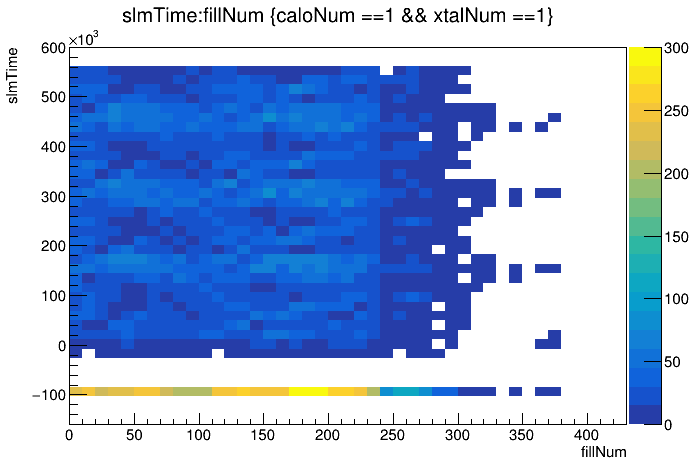

In [4]:
c= r.TCanvas()
t.Draw('slmTime:fillNum', "caloNum ==1 && xtalNum ==1", 'colz')
c.Draw()

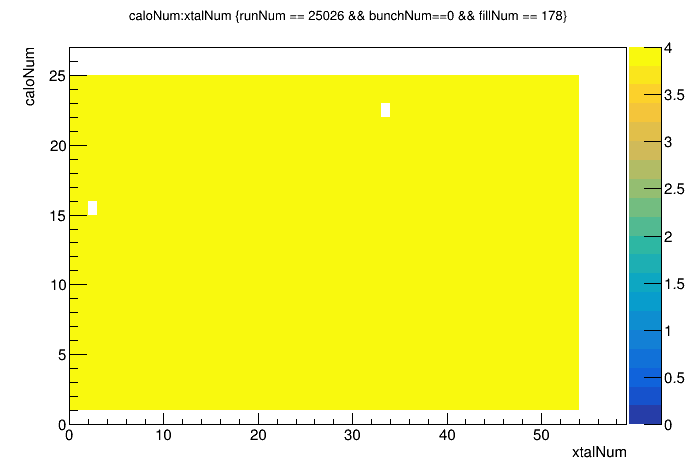

In [5]:
t.Draw('caloNum:xtalNum', "runNum == 25026 && bunchNum==0 && fillNum == 178", 'colz')
c.Draw()

In [6]:
print(df.describe())
print(df.nunique())
print(df.head())

       gpsTimeStamp  cccTimeStamp        runNum     subRunNum       fillNum  \
count  3.779552e+07  3.779552e+07  3.779552e+07  3.779552e+07  3.779552e+07   
mean   1.555790e+09  9.911910e+10  2.496101e+04  2.245266e+02  1.342963e+02   
std    2.544310e+05  5.867342e+10  8.201021e+01  1.350690e+02  7.734417e+01   
min    1.554982e+09  2.163583e+08  2.468500e+04  0.000000e+00  1.000000e+00   
25%    1.555664e+09  4.969637e+10  2.492800e+04  1.090000e+02  6.600000e+01   
50%    1.556000e+09  9.647675e+10  2.502600e+04  2.150000e+02  1.370000e+02   
75%    1.556003e+09  1.477690e+11  2.502600e+04  3.380000e+02  1.960000e+02   
max    1.556034e+09  2.220666e+11  2.503200e+04  4.930000e+02  3.770000e+02   

           bunchNum    fillType       caloNum       xtalNum      sipmTime  \
count  3.779552e+07  37795516.0  3.779552e+07  3.779552e+07  3.779552e+07   
mean   7.500986e+00         1.0  1.249642e+01  2.651775e+01  1.989889e+05   
std    4.609085e+00         0.0  6.923995e+00  1.557810e+

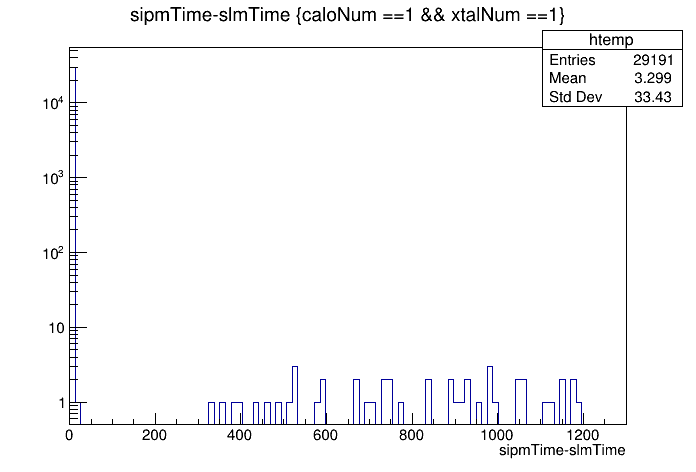

In [9]:
t.Draw('sipmTime-slmTime', "caloNum ==1 && xtalNum ==1")
c.SetLogy()
c.Draw()

In [10]:
df_filtered = df.loc[(df['sipmTime']-df['slmTime']) < 50]

In [ ]:
df_noise = df.loc[(df['sipmTime']-df['slmTime']) > 50]

In [19]:
runNumArray = pd.unique(df_filtered['runNum'])

In [24]:
fillsubRunNums = pd.Series(index= runNumArray, data = np.zeros(18))

In [38]:
for run in fillsubRunNums.keys():
    fillsubRunNums['run'] = pd.unique(df_filtered[df_filtered['runNum'] == run]['subRunNum']).max()

In [28]:
pd.unique(df_filtered[df_filtered['runNum'] == 24928]['subRunNum'])

array([412,  74, 443,  13, 218, 190, 493, 136,  29, 340, 439, 466,  88,
       164, 301, 144, 293, 437, 484,  78, 193,  34,  52,  67, 142, 124,
       174, 387, 116, 284, 165, 298, 378, 430,  20, 156, 364,  38,  40,
       423, 272,  69, 453, 460,  47, 459, 485, 209,  86, 223, 282, 109,
       192, 322, 143, 145, 324, 204, 487, 101, 150, 108, 475, 135, 347,
       356,  96, 180, 242, 478,  70, 181, 158, 360,  16,  60, 161, 335,
        77, 140, 159, 241, 112, 154, 299, 307, 394, 137,  41, 131, 177,
        19, 230, 363, 176, 302,  91,  61, 139,  79, 243,  85, 220, 305,
       199, 354, 246, 191, 118, 370, 208, 172, 342, 198, 388, 479,  28,
        56, 134, 186, 178, 334, 306, 281,  72, 268,  44, 261,  23,  25,
       274, 285, 327, 110, 211, 310, 196, 296, 221,  50,  82, 313, 133,
       217, 278, 339,  94, 182, 232, 279, 130, 245, 128, 366, 189, 239,
       107, 119, 332, 210, 353, 258, 149, 167], dtype=int32)

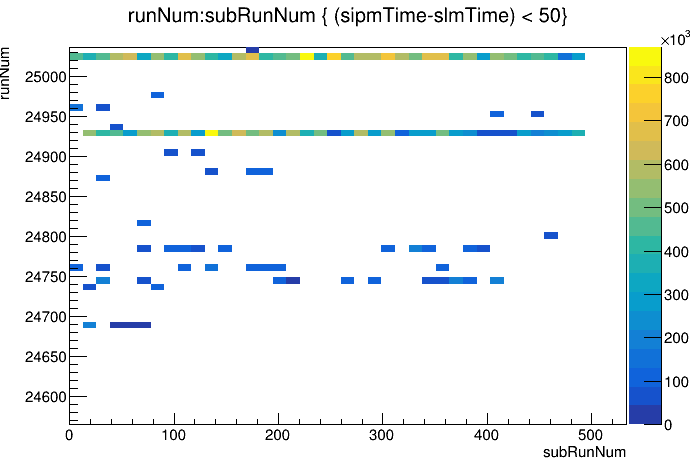

In [36]:
c2 = r.TCanvas()
t.Draw('runNum:subRunNum',' (sipmTime-slmTime) < 50','colz')
c2.Draw()

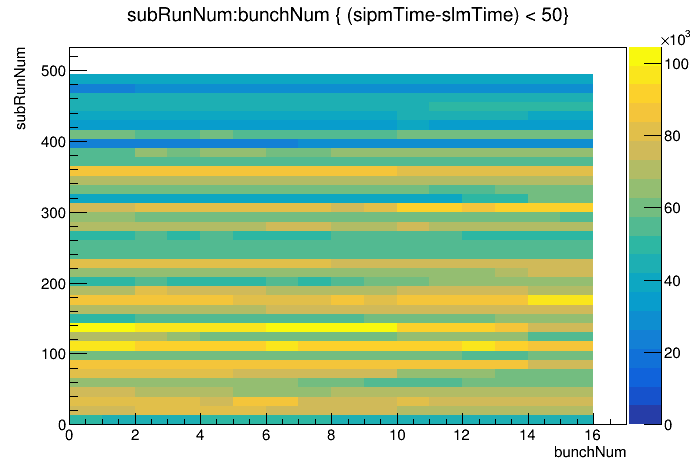

In [42]:
t.Draw('subRunNum:bunchNum',' (sipmTime-slmTime) < 50','colz')
c2.Draw()
#interesitng property, number of data points is consistent across a subRun i.e. no cuts within a bunch

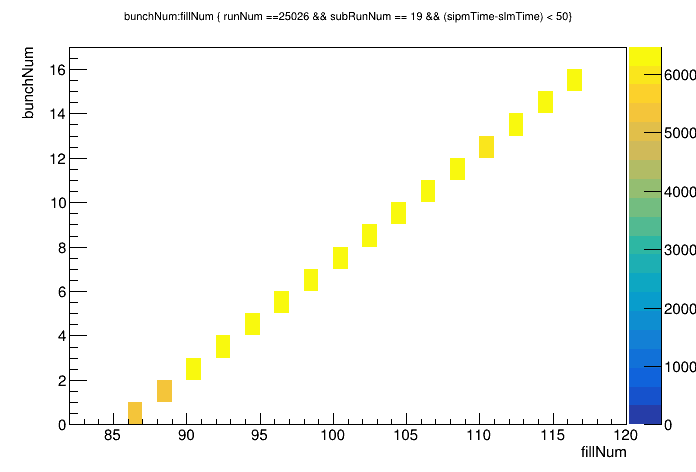

In [72]:
t.Draw('bunchNum:fillNum',' runNum ==25026 && subRunNum == 19 && (sipmTime-slmTime) < 50', 'colz')
c2.SetLogy(0)
c2.Draw()

In [73]:
df_filtered.to_csv('run2cCombined&Filtered')

In [33]:
df_filtered[(df_filtered['runNum']==25026) ].groupby('fillNum').count().max()

gpsTimeStamp    190310
cccTimeStamp    190310
runNum          190310
subRunNum       190310
bunchNum        190310
fillType        190310
caloNum         190310
xtalNum         190310
sipmTime        190310
sipmEnergy      190310
sipmPedestal    190310
sipmChi2        190310
smPin1Amp       190310
smPin1Time      190310
smPin2Amp       190310
smPin2Time      190310
smPmtAmp        190310
smPmtTime       190310
lmPmtAmp1       190310
lmPmtAmp2       190310
lmPmtArea1      190310
lmPmtArea2      190310
lmPmtTime1      190310
lmPmtTime2      190310
slmTime         190310
slmEnergy       190310
slmPedestal     190310
slmChi2         190310
dtype: int64

In [141]:
calo = 1
xtal =1


In [142]:
df_xtal = df_filtered[(df_filtered['caloNum']==calo)& (df_filtered['xtalNum']==xtal)]
fullRunPulse = df_xtal[(df_xtal['runNum']== 24928)]

avgSyncPulse = fullRunPulse[fullRunPulse['slmTime']<-10000].groupby('bunchNum').mean()['slmEnergy'].reset_index()
avgSyncPulse.rename({'slmEnergy': 'syncEnergy'}, axis = 'columns',inplace=True )
fullRunPulse  = pd.merge(fullRunPulse,avgSyncPulse, how = 'inner', on = ['bunchNum'])
fullRunPulse['normalSlmEnergy'] = (fullRunPulse['slmEnergy']/fullRunPulse['syncEnergy'])

In [88]:
fullRunPulse

,gpsTimeStamp,cccTimeStamp,runNum,subRunNum,fillNum,bunchNum,fillType,caloNum,xtalNum,sipmTime,...,lmPmtArea1,lmPmtArea2,lmPmtTime1,lmPmtTime2,slmTime,slmEnergy,slmPedestal,slmChi2,syncEnergy,normalSlmEnergy
0,1.555667e+09,1.880835e+11,24928,412,178,0,1,1,1,-99404.141620,...,27700.0,13555.0,5290.0,5478.0,-99406.160620,3837.187198,-1803.181425,21.196002,3774.621121,1.016575
1,1.555667e+09,1.880835e+11,24928,412,178,0,1,1,1,123909.746185,...,29255.0,12888.0,228604.0,228793.0,123907.757656,3878.397650,-1802.807859,19.205144,3774.621121,1.027493
2,1.555667e+09,1.880835e+11,24928,412,178,0,1,1,1,271913.807726,...,28542.0,13874.0,376609.0,376796.0,271911.816601,3838.014048,-1802.515267,15.780971,3774.621121,1.016795
3,1.555667e+09,1.880835e+11,24928,412,178,0,1,1,1,419909.602885,...,29430.0,12550.0,524604.0,524791.0,419907.610350,3929.367734,-1803.029454,18.369001,3774.621121,1.040997
4,1.556000e+09,1.216988e+10,25026,28,111,0,1,1,1,-99411.818430,...,27850.0,12877.0,5304.0,5491.0,-99413.837430,3860.093804,-1802.175780,17.553798,3774.621121,1.022644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25360,1.556004e+09,1.767295e+11,25026,418,210,15,1,1,1,-99433.647176,...,28713.0,13851.0,5303.0,5490.0,-99435.666176,3639.710244,-1801.815036,19.935287,3780.334834,0.962801
25361,1.556004e+09,1.767295e+11,25026,418,210,15,1,1,1,49882.309776,...,28577.0,12647.0,154618.0,154806.0,49880.365048,3578.533579,-1801.657422,25.188090,3780.334834,0.946618
25362,1.556004e+09,1.767295e+11,25026,418,210,15,1,1,1,197886.416208,...,28999.0,13281.0,302623.0,302810.0,197884.501923,3614.343085,-1801.493524,24.948036,3780.334834,0.956091
25363,1.556004e+09,1.767295e+11,25026,418,210,15,1,1,1,345882.343640,...,28057.0,13632.0,450618.0,450807.0,345880.341217,3557.262851,-1801.997239,35.368467,3780.334834,0.940991


Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).


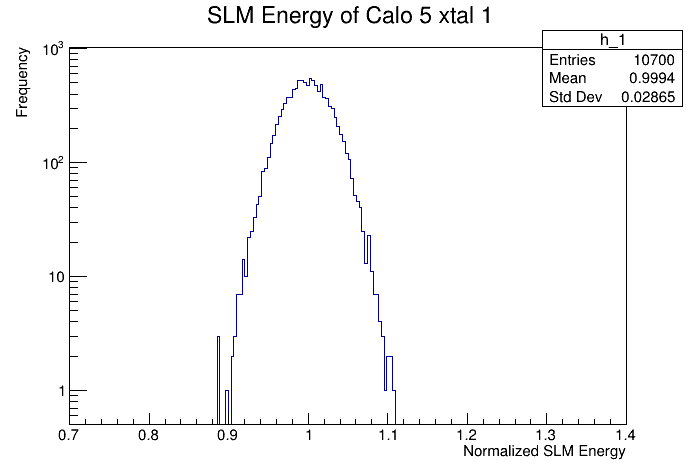

In [143]:
h = r.TH1D(f"h_{1}", "SLM Energy of Calo 5 xtal 1; Normalized SLM Energy; Frequency", 200, 0.7, 1.4)

for x in fullRunPulse['normalSlmEnergy']:
    h.Fill(x)

h.Draw()
c.Draw()

#on a fill by fill basis
#bunch number doesn't matter
#pd func unique id creation of db

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_4 (Potential memory leak).


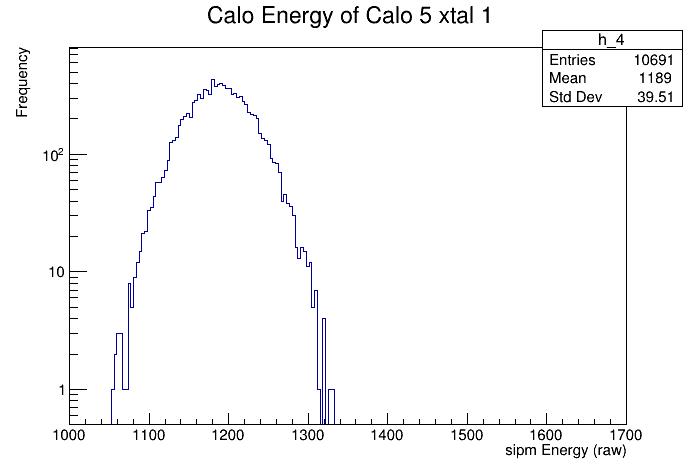

In [140]:
h4 = r.TH1D(f"h_{4}", "Calo Energy of Calo 5 xtal 1; sipm Energy (raw); Frequency", 200, 1000, 1700)

for x in fullRunPulse['sipmEnergy']:
    h4.Fill(x)

h4.Draw()
c.Draw()

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).


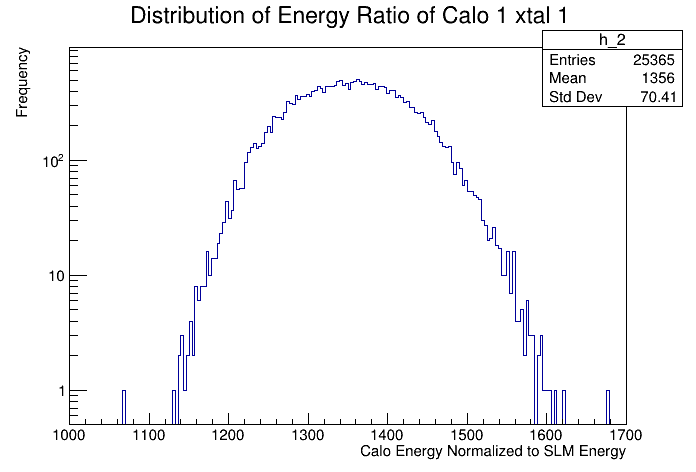

In [95]:
h2 = r.TH1D(f"h_{2}", "Distribution of Energy Ratio of Calo 1 xtal 1; Calo Energy Normalized to SLM Energy; Frequency", 200, 1000, 1700)

for y in fullRunPulse['sipmEnergy']/fullRunPulse['normalSlmEnergy']:
    h2.Fill(y)

h2.Draw()
c.Draw()


mean = h2.GetMean()


Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_3 (Potential memory leak).


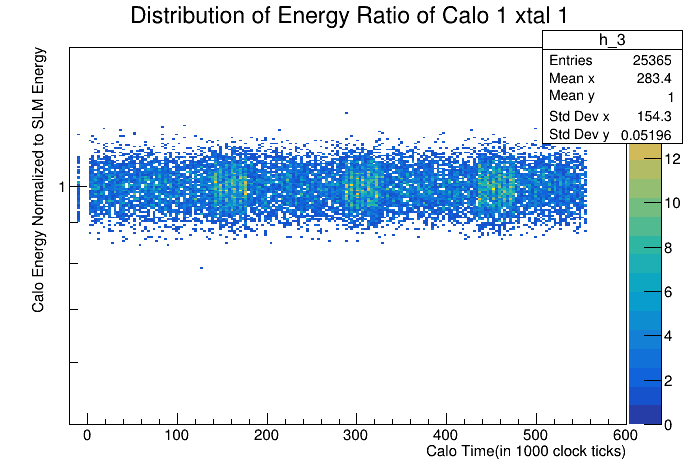

In [111]:
h3 = r.TH2D(f"h_{3}", "Distribution of Energy Ratio of Calo 1 xtal 1; Calo Time(in 1000 clock ticks); Calo Energy Normalized to SLM Energy",
            200, -20, 600,
            200,0.5,1.5)

for (x,y) in zip(fullRunPulse['sipmTime'], fullRunPulse['sipmEnergy']/fullRunPulse['normalSlmEnergy']/mean):
    h3.Fill(x/1000,y)

h3.Draw('colz')
c.Draw()



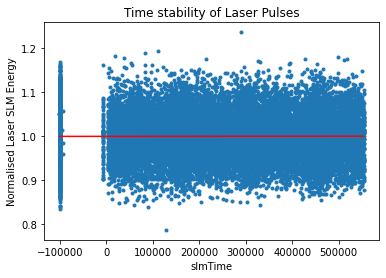

In [118]:
fig,ax = plt.subplots()
ax.plot(fullRunPulse['sipmTime'], fullRunPulse['sipmEnergy']/fullRunPulse['normalSlmEnergy']/mean,".")
ax.set_title("Time stability of Laser Pulses")
ax.set_xlabel("slmTime")
ax.set_ylabel("Normalised Laser SLM Energy")
# fit a curve (linear for now) through the stability of time 


def func(x,m,b):
    return m*x + b 

initial_guess = [1.2, 0.03]
pars, pcov = curve_fit(func, fullRunPulse['sipmTime'], fullRunPulse['sipmEnergy']/fullRunPulse['normalSlmEnergy']/mean, p0=initial_guess)
xfit = np.linspace(np.amin(fullRunPulse['sipmTime']),np.amax(fullRunPulse['sipmTime']))
yfit = func(xfit, pars[0], pars[1])
plt.plot(xfit,yfit,'r-',label=f"Linear Fit\nm={pars[0]:.2f}\nb={pars[1]:.2f}")

slope = pars[0]
std = np.sqrt(pcov.trace())

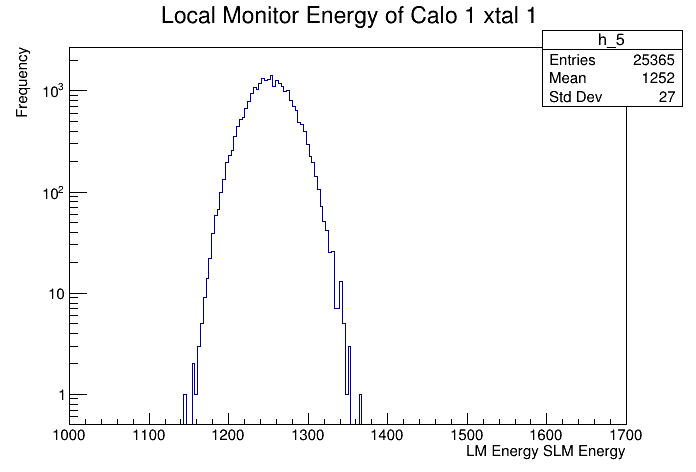

In [119]:
h5 = r.TH1D(f"h_{5}", "Local Monitor 1 Energy of Calo 1 xtal 1; LM Energy; Frequency", 200, 1000, 1700)

for y in fullRunPulse['lmPmtAmp1']:
    h5.Fill(y)

h5.Draw()
c.Draw()

In [ ]:
h5 = r.TH1D(f"h_{5}", "Local Monitor 2 Energy of Calo 1 xtal 1; LM Energy; Frequency", 200, 1000, 1700)

for y in fullRunPulse['lmPmtAmp2']:
    h5.Fill(y)

h5.Draw()
c.Draw()

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_6 (Potential memory leak).


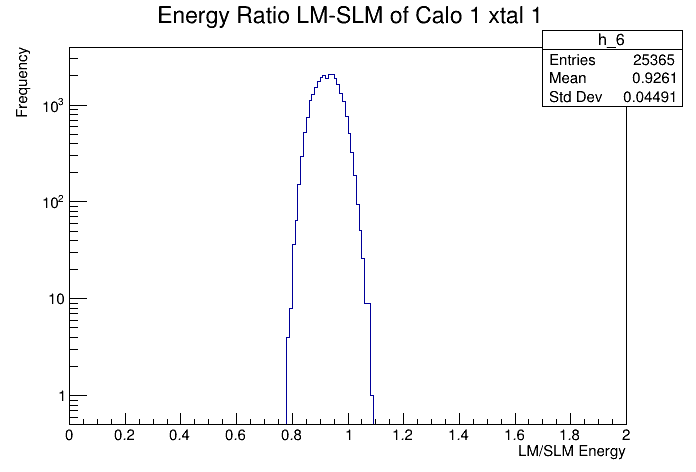

In [126]:
h6 = r.TH1D(f"h_{6}", "Energy Ratio LM1-SLM of Calo 1 xtal 1; LM/SLM Energy; Frequency", 200, 0, 2)

for y in fullRunPulse['lmPmtAmp1']/fullRunPulse['normalSlmEnergy']/mean:
    h6.Fill(y)

h6.Draw()
c.Draw()

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_6 (Potential memory leak).


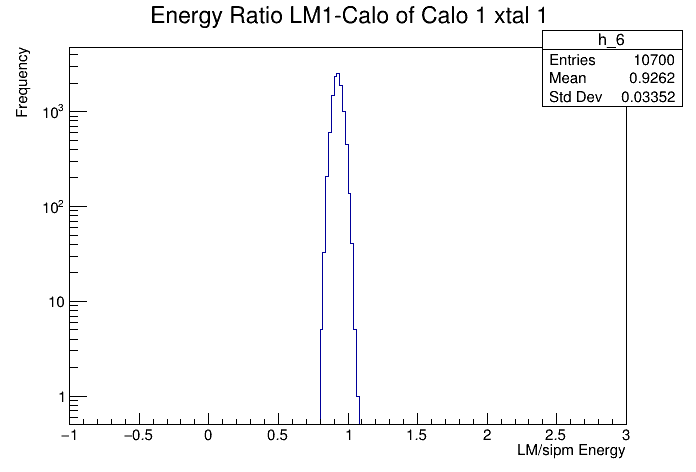

In [152]:
h6 = r.TH1D(f"h_{6}", "Energy Ratio LM1-Calo of Calo 1 xtal 1; LM/sipm Energy; Frequency", 200, -1, 3)

for y in fullRunPulse['lmPmtAmp1']/fullRunPulse['sipmEnergy']:
    h6.Fill(y)

h6.Draw()
c.Draw()

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_8 (Potential memory leak).


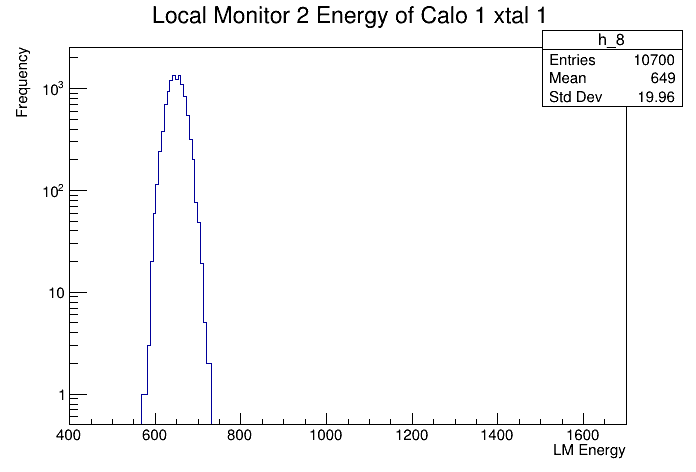

In [148]:
h8 = r.TH1D(f"h_{8}", "Local Monitor 2 Energy of Calo 1 xtal 1; LM Energy; Frequency", 200, 400, 1700)

for y in fullRunPulse['lmPmtAmp2']:
    h8.Fill(y)

h8.Draw()
c.Draw()

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_6 (Potential memory leak).


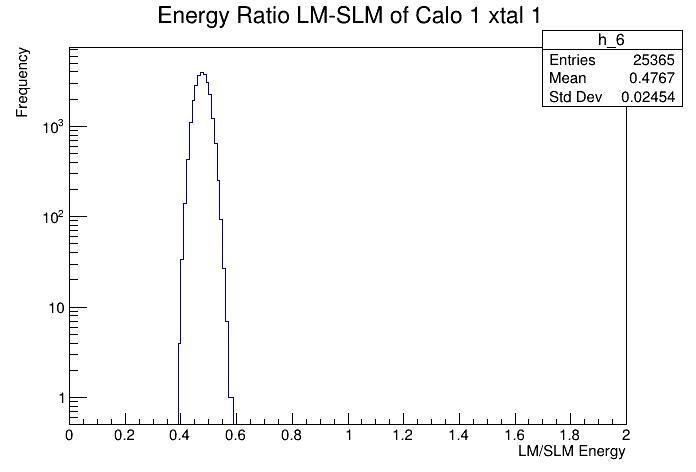

In [129]:
h6 = r.TH1D(f"h_{6}", "Energy Ratio LM2-SLM of Calo 1 xtal 1; LM/SLM Energy; Frequency", 200, 0, 2)

for y in fullRunPulse['lmPmtAmp2']/fullRunPulse['normalSlmEnergy']/mean:
    h6.Fill(y)

h6.Draw()
c.Draw()

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_6 (Potential memory leak).


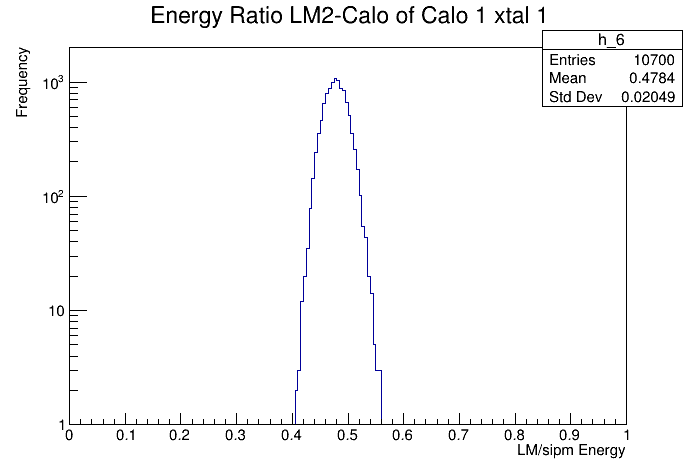

In [150]:
h6 = r.TH1D(f"h_{6}", "Energy Ratio LM2-Calo of Calo 1 xtal 1; LM/sipm Energy; Frequency", 200, 0, 1)

for y in fullRunPulse['lmPmtAmp2']/fullRunPulse['sipmEnergy']:
    h6.Fill(y)

h6.Draw()
c.Draw()

KeyboardInterrupt: 

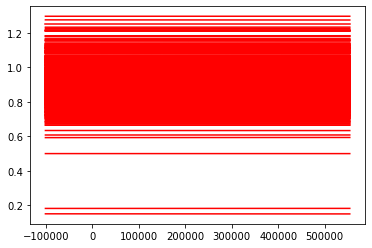

In [132]:
slopes = np.zeros((24,54))
stds = np.zeros((24,54))

for calo in pd.unique(df['caloNum']):
    for xtal in  pd.unique(df['xtalNum']):
        df_xtal = df_filtered[(df_filtered['caloNum']==calo)& (df_filtered['xtalNum']==xtal)]
        fullRunPulse = df_xtal[(df_xtal['runNum']== 24928) | (df_xtal['runNum']== 25026)]

        avgSyncPulse = fullRunPulse[fullRunPulse['slmTime']<-10000].groupby('bunchNum').mean()['slmEnergy'].reset_index()
        avgSyncPulse.rename({'slmEnergy': 'syncEnergy'}, axis = 'columns',inplace=True )
        fullRunPulse  = pd.merge(fullRunPulse,avgSyncPulse, how = 'inner', on = ['bunchNum'])
        fullRunPulse['normalSlmEnergy'] = (fullRunPulse['slmEnergy']/fullRunPulse['syncEnergy'])

        def func(x,m,b):
            return m*x + b 

        initial_guess = [1.2, 0.03]
        pars, pcov = curve_fit(func, fullRunmTime'], fullRunPulse['sipmEnergy']/fullRunPulse['normalSlmEnergy']/mean, p0=initial_guess)
        xfit = np.linspace(np.amin(fullRunPulse['sipmTime']),np.amax(fullRunPulse['sipmTime']))
        yfit = func(xfit, pars[0], pars[1])
        plt.plot(xfit,yfit,'r-',label=f"Linear Fit\nm={pars[0]:.2f}\nb={pars[1]:.2f}")

        slopes[calo-1][xtal] = pars[0]
        stds[calo-1][xtal]= np.sqrt(pcov.trace())

In [ ]:
arr = np.zeros((24 ,6,9))
    
for calo in pd.unique(df['caloNum']):
    arr[calo-1] = slopes[calo-1].reshape(6,9)

plt.rcParams["figure.figsize"] = (18,9) 

plt.matshow(arr[16], cmap=plt.cm.Blues)
plt.colorbar()

